# Neural Networks for Data Science Applications
## Mid-term Homework: Implementing a custom activation function

**Name**: *Ali Reza Seifi Mojaddar\>*

**Matricola**: *\<1900547\>*

Send the completed notebook before 26/11/2020 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_1_\<id\>".

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
from numpy import arange

### Introduction

The **exponential linear unit** (ELU) is an activation function defined as [1]:

$$
\phi(x) =
\Biggl\{ 
\begin{align} 
x & \;\; \text{ if } x \ge 0 \\
\alpha \left(\exp\left(x\right)- 1\right) & \;\; \text{ otherwise } 
\end{align}
\Bigr.
\,,
$$

where $\alpha$ is a hyper-parameter. The function is implemented in `tf.keras.layers.ELU` (see the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ELU)).

The **parametric ELU** (PELU) extends the ELU activation function as [2]:

$$
\phi(x) =
\Biggl\{ 
\begin{align} 
\frac{\alpha}{\beta}x & \;\; \text{ if } x \ge 0 \\
\alpha \left(\exp\Bigl(\frac{x}{\beta}\Bigr)- 1\right) & \;\; \text{ otherwise } 
\end{align}
\Bigr.
\,,
$$

where the major difference is that $\alpha,\beta > 0$ are *trainable* parameters, i.e., a pair of $(\alpha, \beta)$ values is trained for each unit in the network.

### Exercise 1: implement the PELU

In TensorFlow, it is possible to implement new layers by subclassing `tf.keras.layers.Layer`:

+ [Making new Layers and Models via subclassing](https://www.tensorflow.org/guide/keras/custom_layers_and_models)
+ [Custom layers](https://www.tensorflow.org/tutorials/customization/custom_layers)
+ [tf.keras.layers.Layer (documentation)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)

**Exercise 1**: *After carefully reading the guides*, complete the following implementation of the PELU activation function.

In [2]:
class PELU(tf.keras.layers.Layer): # this is the final version till now !!!!!
    def __init__(self, units=32, autocast=False):
        super(PELU, self).__init__()
        self.units = units
        
    
    def build(self, input_shape):
        self.alpha = self.add_weight( name='alpha', shape=(input_shape[-1], ),initializer='ones',constraint=lambda x: tf.clip_by_value(x, .1, np.inf),trainable=True)
        self.beta  = self.add_weight( name='beta', shape=(input_shape[-1], ),initializer='ones',constraint=lambda x: tf.clip_by_value(x, .1, np.inf),trainable=True)
        super(PELU, self).build(input_shape)
    
    def call(self, x):

        return tf.add(
                      tf.multiply(tf.divide(self.alpha, tf.add(self.beta, 1e-9)), tf.maximum(0., x)),
                      tf.multiply(self.alpha, tf.add(-1.0, tf.exp(tf.divide(tf.minimum(0., x), tf.add(self.beta, 1e-9)))))
                    )
    def get_config(self):
        config = super(PELU, self).get_config()
        config.update({"units": self.units})
        return config    

**Hints for a correct implementation**:

1. The layer (probably) requires two sets of trainable variables, whose shape depends on the number of units.
2. From the definition of the PELU, $\alpha, \beta$ are required to be positive in order to ensure differentiability. The simplest way to handle this is to use a [constraint callable](https://www.tensorflow.org/api_docs/python/tf/keras/constraints) when creating the weight (see also the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) for `add_weight`).

### Exercise 2: some preliminary tests

To evaluate your implementation, let us start by creating a single PELU function:

In [44]:
pelu = PELU(units=1)

In [36]:
pelu.trainable_weights

[<tf.Variable 'pelu_8/alpha:0' shape=(200,) dtype=float32, numpy=
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>,
 <tf.Variable 'pelu_

**Exercise 2.1**: plot the function using the skeleton code below.

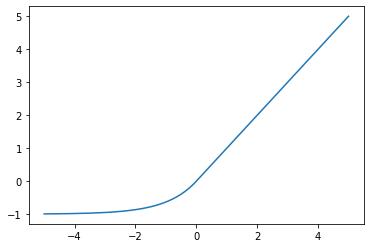

In [45]:
import matplotlib.pyplot as plt
x_range = tf.linspace(-5., 5., 200) # An equispaced grid of 200 points in [-5, +5]
y_range = pelu(x_range) # TODO: Your code here
plt.plot(x_range.numpy(), y_range.numpy())

The derivative of a PELU function with respect to the $\alpha$ parameter is given by [2]:

$$
\frac{d\phi(x)}{d\alpha} =
\Biggl\{ 
\begin{align} 
\frac{x}{\beta} & \;\; \text{ if } x \ge 0 \\
 \left(\exp\Bigl(\frac{x}{\beta}\Bigr)- 1\right) & \;\; \text{ otherwise } 
\end{align}
\Bigr.
\,,
$$

**Exercise 2.2**: using a `tf.GradientTape` object, compute the derivative above using automatic differentiation, and check its correctness up to a certain numerical precision.

**Hints for a correct implementation**:

1. `tf.GradientTape` allows to compute the derivative *at a single point x*. If you prefer to avoid a loop over all possible points, consider using the `jacobian` function to obtain them in a single pass ([Advanced Automatic Differentiation](https://www.tensorflow.org/guide/advanced_autodiff)).
2. Given two tensors x and y, a simple way to compute elementwise similarity up to a certain precision (e.g., $10^{-4}$), is given by `tf.reduce_all(tf.abs(x - y) < 1e-4)`.

**Exercise 2.3 (optional)**: try the same for the $\beta$ parameter (you can check the analytical formula for the gradient in the original paper [2]). **Careful**: the equation in the original paper has a missing $h$ (thanks to Davide Aureli and Federico Siciliano for spotting this). See [the correct derivation](https://www.wolframalpha.com/input/?i=d%28a*%28exp%28h%2Fb%29-1%29%29%2Fdb) on Wolfram Alpha.

In [ ]:
# Derivative Section With gradient

In [38]:
with tf.GradientTape(persistent=True) as tape:
  tape.watch(pelu.alpha)
  y = pelu(x_range)
result = tape.gradient(y, pelu.alpha)

In [42]:
tf.reduce_all(tf.abs(result - manual) < 1e-4)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [41]:
# Derivative Section with Jacobian

In [42]:
with tf.GradientTape(persistent=True) as tape:
  y = pelu(x_range)

In [43]:
output = tape.jacobian(y, pelu.alpha)

In [44]:
# Manual Derivative Function

In [40]:
def Manual(x):
  y = tf.add(
      tf.divide(tf.maximum(0., x_range), tf.add(pelu.beta, 1e-9)),
      tf.add(-1.0, tf.exp(tf.divide(tf.minimum(0., x_range), tf.add(pelu.beta, 1e-9))))
  )
  return y

In [41]:
manual = Manual(x_range)

In [47]:
tf.reduce_all(tf.abs(output[output != 0.] - manual[:]) < 1e-4)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [48]:
# Visualizing the Number of True and False's in Jacobian.

In [49]:
result = [int(tf.reduce_all(tf.abs(output[i,i] - manual[i]) < 1e-4).numpy()) for i in range(200)]
True_Num  = result.count(1)
False_Num = result.count(0)

In [50]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('Jacobian'))
fig.add_trace(go.Bar(x=['True',"False"], y=[True_Num, False_Num]))
fig.update_layout(barmode='relative',  bargap=0.05, width=700, height=400)

In [4]:
# Calculating Gradient With respect to Beta using Plotly

In [54]:
with tf.GradientTape(persistent=True) as tape:
  y = pelu(x_range)
beta_result = tape.gradient(y, pelu.beta)

In [72]:
def beta():
  return tf.add(tf.multiply(-1., tf.divide(tf.multiply(pelu.alpha, tf.maximum(0., x_range)), tf.pow(tf.add(pelu.beta, 1e-9), 2))),
                tf.multiply(-1.,tf.divide(tf.multiply(tf.multiply(pelu.alpha, tf.minimum(0., x_range)), tf.exp(tf.divide(tf.minimum(0., x_range), tf.add(pelu.beta, 1e-9)))),tf.pow(tf.add(pelu.beta, 1e-9), 2.))))

In [73]:
beta_manual = beta()

In [74]:
tf.reduce_all(tf.abs(beta_result - beta_manual) < 1e-4)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Plotting With Plotly

In [75]:
result = [int(tf.reduce_all(tf.abs(beta_result[i] - beta_manual[i]) < 1e-4).numpy()) for i in range(200)]
True_Num  = result.count(1)
False_Num = result.count(0)

In [76]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('Beta'))
fig.add_trace(go.Bar(x=['True',"False"], y=[True_Num, False_Num]))
fig.update_layout(barmode='relative',  bargap=0.05, width=700, height=400)

### Exercise 3: PELU in practice

Consider a simple model built with the PELU activation function, as below.

In [52]:
model_PELU = tf.keras.Sequential(layers=[
      tf.keras.layers.Flatten(),                              
      tf.keras.layers.Dense(50),
      PELU(50),
      tf.keras.layers.Dense(10, activation='softmax')
])

In [53]:
model_RELU = tf.keras.Sequential(layers=[
      tf.keras.layers.Flatten(),                              
      tf.keras.layers.Dense(50),
      tf.keras.layers.ReLU(50),
      tf.keras.layers.Dense(10, activation='softmax')
])

In [54]:
# Loading the FASHION_MNIST Dataset

In [55]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [56]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [57]:
model_PELU.compile(optimizer = tf.optimizers.Adam(), #without RELU 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_PELU = model_PELU.fit(training_images, training_labels, epochs=250)

Epoch 1/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5082 - accuracy: 0.8203
Epoch 2/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3834 - accuracy: 0.8613
Epoch 3/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3481 - accuracy: 0.8728
Epoch 4/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3251 - accuracy: 0.8803
Epoch 5/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3083 - accuracy: 0.8852
Epoch 6/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8912
Epoch 7/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.8939
Epoch 8/250
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2747 - accuracy: 0.8966
Epoch 9/250
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9010
Epoch 10/250
1875/1875 [==============================] - 3s 2ms/step - l

In [58]:
model_PELU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_4 (Dense)              (32, 50)                  39250     
_________________________________________________________________
pelu_3 (PELU)                (32, 50)                  100       
_________________________________________________________________
dense_5 (Dense)              (32, 10)                  510       
Total params: 39,860
Trainable params: 39,860
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_RELU.compile(optimizer = tf.optimizers.Adam(), #without RELU 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_RELU = model_RELU.fit(training_images, training_labels, epochs=250)

Epoch 1/250
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5281 - accuracy: 0.8178
Epoch 2/250
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4035 - accuracy: 0.8576
Epoch 3/250
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3677 - accuracy: 0.8691
Epoch 4/250
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3420 - accuracy: 0.8763
Epoch 5/250
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3223 - accuracy: 0.8832
Epoch 6/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3078 - accuracy: 0.8860
Epoch 7/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2988 - accuracy: 0.8905
Epoch 8/250
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2873 - accuracy: 0.8943
Epoch 9/250
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2791 - accuracy: 0.8971
Epoch 10/250
1875/1875 [==============================] - 3s 1ms/step - l

In [60]:
PELU_Score = model_PELU.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.2886 - accuracy: 0.8688


In [61]:
RELU_Score = model_RELU.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.1245 - accuracy: 0.8719


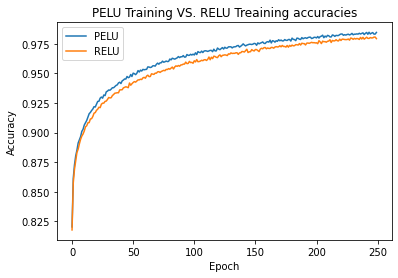

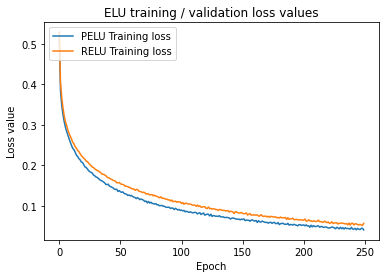

In [62]:
plt.plot(history_PELU.history['accuracy'], label='PELU')
plt.plot(history_RELU.history['accuracy'], label='RELU')
plt.title('PELU Training VS. RELU Treaining accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history_PELU.history['loss'], label='PELU Training loss')
plt.plot(history_RELU.history['loss'], label='RELU Training loss')
plt.title('ELU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()


In [63]:
# summarize model performance
def summarize_performance(score):
  # print summary
  plt.figure(figsize=(15, 7))
  plt.boxplot(score)
  plt.xticks(arange(2)+1., ['PELU', 'RELU'], color='blue')
	

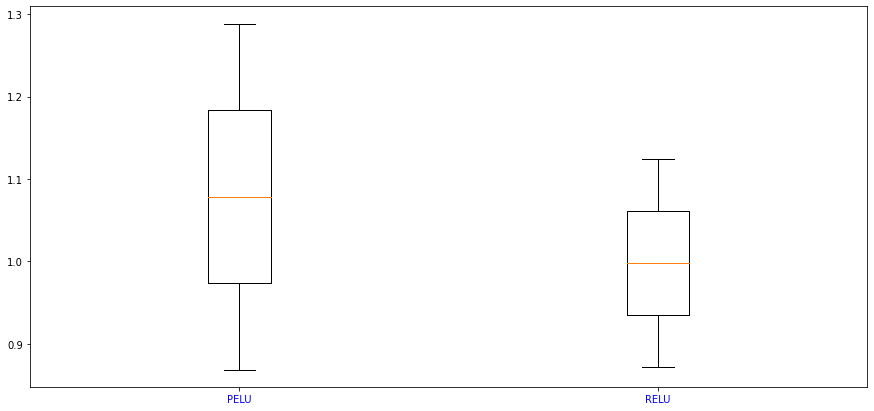

In [64]:
data_to_plot = [PELU_Score, RELU_Score]
summarize_performance(data_to_plot)

**Exercise 3**: load any classification dataset, and train the model above (using either a custom training loop or `model.fit(...)`). Additionally, compare with a standard ReLU activation.

### Optional: understanding saving/loading of models

TensorFlow has several options for saving or loading objects from the disk:

1. [Save and load Keras models](https://www.tensorflow.org/guide/keras/save_and_serialize/)

In many cases, custom classes require the implementation of a `get_config` / `from_config` functions to define the serialization behaviour.

**Exercise 4 (optional)**: implement the `get_config` method and test your implementation as below (taken from the guide on saving and loading models).

In [65]:
model_PELU.save('pelu_model')
del PELU # This is needed to remove any reference to PELU from memory
reloaded_model = tf.keras.models.load_model('pelu_model')

INFO:tensorflow:Assets written to: pelu_model/assets


In [66]:
print("Original model:", model_PELU)
print("Loaded model:", reloaded_model) # Observe that the object has been dynamically recreated in absence of the configuration options

Original model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f17b5b14b70>
Loaded model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f17b612b748>


In [67]:
model_PELU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
pelu_3 (PELU)                (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 39,860
Trainable params: 39,860
Non-trainable params: 0
_________________________________________________________________


In [68]:
reloaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
pelu_3 (PELU)                (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 39,860
Trainable params: 39,860
Non-trainable params: 0
_________________________________________________________________


In [69]:
reloaded_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_2_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_2',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_4',
    'trainable': True,
    'units': 50,
    'use_bias': True}},
  {'class_name': 'PELU',
   'config': {'dtype': 'float32',
    'name': 'pelu_3',
    'trainable': True,
    'units': 50}},
  {'class_name': 'Dense',
   'config': {'activation': 

In [70]:
model_PELU.trainable_weights

[<tf.Variable 'dense_4/kernel:0' shape=(784, 50) dtype=float32, numpy=
 array([[-1.20298314e+00, -6.36538565e-02,  8.82164657e-01, ...,
          4.24800396e+00,  1.36427760e-01,  3.75160813e+00],
        [-8.08053303e+00,  5.36800146e-01,  4.46334028e+00, ...,
          1.42236710e+00, -4.60925245e+00,  3.93279219e+00],
        [ 2.90532637e+00, -5.86079025e+00,  1.92322820e-01, ...,
         -1.80480957e+00, -3.59054661e+00,  5.17981434e+00],
        ...,
        [ 1.03789486e-01, -9.25643623e-01, -1.62987947e+00, ...,
         -6.87891364e-01,  1.10866189e+00,  5.66375582e-03],
        [ 1.67371893e+00,  2.61146402e+00, -4.06983137e+00, ...,
          2.43734312e+00,  3.67910171e+00, -3.25175762e-01],
        [ 4.50793886e+00, -6.09989595e+00,  5.10613060e+00, ...,
         -2.31855488e+00,  1.37151062e+00,  1.07814562e+00]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(50,) dtype=float32, numpy=
 array([-0.8345965 , -0.7620273 , -0.02904847,  0.89614445, -0.21168944,
    

### References

[1] Clevert, D.A., Unterthiner, T. and Hochreiter, S., 2015. [Fast and accurate deep network learning by exponential linear units (ELUs)](https://arxiv.org/abs/1511.07289). arXiv preprint arXiv:1511.07289.

[2] Trottier, L., Gigu, P. and Chaib-draa, B., 2017. [Parametric exponential linear unit for deep convolutional neural networks](https://arxiv.org/abs/1605.09332). In 2017 16th IEEE International Conference on Machine Learning and Applications (ICMLA) (pp. 207-214). IEEE.